In [1]:
from cbrain.data_generator import DataGenerator
import numpy as np
import matplotlib.pyplot as plt
from cbrain.utils import *
import pandas as ps
import matplotlib.image as pltimg

In /pf/b/b309162/work/miniconda3/envs/thunder_cpu_II_plot/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /pf/b/b309162/work/miniconda3/envs/thunder_cpu_II_plot/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /pf/b/b309162/work/miniconda3/envs/thunder_cpu_II_plot/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /pf/b/b309162/work/miniconda3/envs/thunder_cpu_II_plot/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was depreca

For the computation of the W-K diagrams we use the second year of the SP simulation with a sampling window of 60 days 

In [2]:
scale_array=ps.read_csv('nn_config/scale_dicts/Scaling_cond_VAE.csv')


PHQ_std_surf=scale_array.PHQ_std.values[-1]

TPHYSTND_std_23=scale_array.TPHYSTND_std.values[-1]

PRECT_std=scale_array.PRECT_std.values
FSNS_std=scale_array.FSNS_std.values
FSNT_std=scale_array.FSNT_std.values
FLNS_std=scale_array.FLNS_std.values
FLNT_std=scale_array.FLNT_std.values


scale_array_2D=ps.read_csv('nn_config/scale_dicts/Scaling_enc_II_range_profiles.csv')
scale_array_1D=ps.read_csv('nn_config/scale_dicts/Scaling_enc_II_range.csv')

TBP_std_surf=scale_array_2D.TBP_std.values[-1]

QBP_std_surf=scale_array_2D.QBP_std.values[-1]

Q_lat_std_surf=scale_array_1D.Q_lat_std.values

Q_sens_std_surf=scale_array_1D.Q_sens_std.values


Q_solar_std_surf=scale_array_1D.Q_sol_std.values

PS_std_surf=scale_array_1D.PS_std.values




scale_dict_II = {
    'PHQ': 1/PHQ_std_surf, 
    'QBP':1/QBP_std_surf,
    'TPHYSTND': 1/TPHYSTND_std_23, 
    'TBP':1/TBP_std_surf,
    'FSNT': 1/FSNT_std, 
    'FSNS': 1/FSNS_std, 
    'FLNT': 1/FLNT_std, 
    'FLNS': 1/FLNS_std, 
    'PRECT': 1/PRECT_std, 
    'LHFLX': 1/Q_lat_std_surf, 
    'SHFLX': 1/Q_sens_std_surf, 
    'SOLIN': 1/Q_solar_std_surf,
    'PS':1/PS_std_surf
}

in_vars = ['QBP', 'TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars = ['PHQ','TPHYSTND','FSNT', 'FSNS', 'FLNT', 'FLNS', 'PRECT','QBP', 'TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']

# we use outgoing longwave radiation 'FLNT' for the computation of W-K plots

##This year includes a 3 month sequence used as validation set (April, May and June) during training

val_gen_II = DataGenerator(
    data_fn = '../preprocessed_data/005_valid_1_year.nc',
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = '../preprocessed_data/000_norm_1_month.nc',
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict_II,
    batch_size=8192,
    shuffle=True
)


# Compute W-K diagrams 

We use the data set of 1 year outgoing longwave radiation at the model top to compute the W-K diagrams of SP (as reference) and for the neural network predictions.  

In [ ]:
#for the VAE 

!python VAE_clim_clim_conv_tropics_wheeler_kiladis_1_year.py

In [ ]:
#for the AE

!python AED_clim_clim_conv_tropics_OLR_1_year_wheeler_kiladis.py

In [ ]:
#for the reference ANN
!python reference_ANN_tropics_Wheeler_kiladis_1_year.py

These scripts were used to compute the W-K diagrams and difference plots shown in the paper. The saved comparison figures are saved in folder ./wheeler_kiladis.

## Show W-K comparison figures for VAE, AE and reference ANN

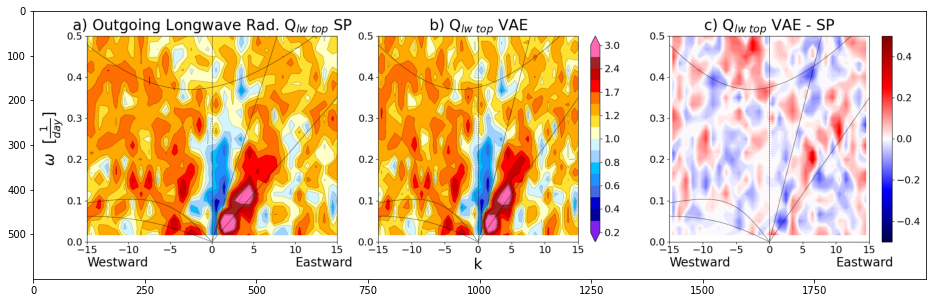

In [3]:
# the comparison W-K figure for VAE
plt.figure(1,(16,9))
img=pltimg.imread('./wheeler_kiladis/VAE_clim_clim_conv_OLR_1_year_15NS_diff_fixed_combo_2.png')
imgplot = plt.imshow(img)
plt.show()


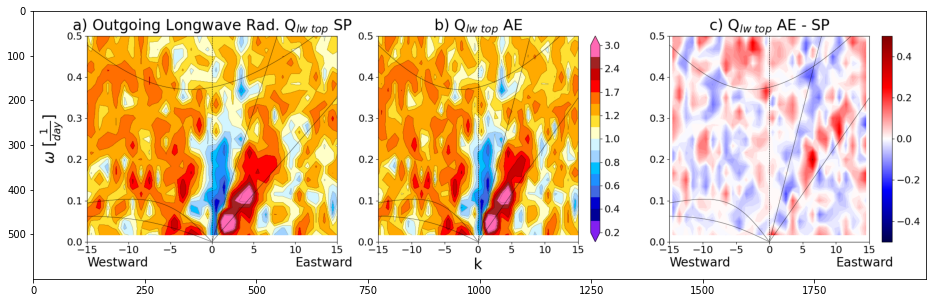

In [4]:
# the comparison W-K figure for AE
plt.figure(2,(16,9))
img=pltimg.imread('./wheeler_kiladis/AED_clim_clim_conv_OLR_1_year_15NS_diff_fixed_combo_2.png')
imgplot = plt.imshow(img)
plt.show()


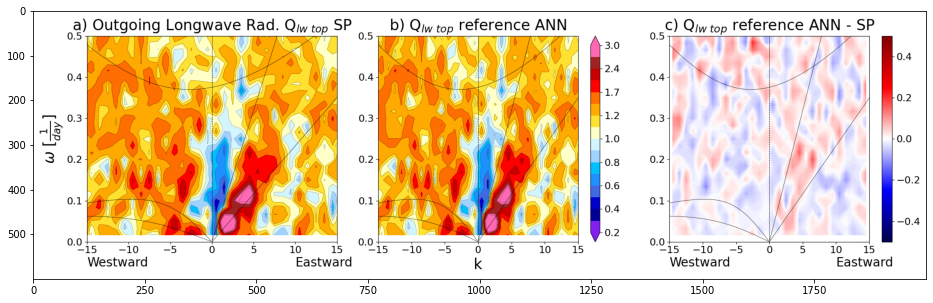

In [5]:
# the comparison W-K figure for reference ANN
plt.figure(3,(16,9))
img=pltimg.imread('./wheeler_kiladis/reference_ANN_OLR_1_year_15NS_diff_fixed_combo_1.png')
imgplot = plt.imshow(img)
plt.show()
